In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
%matplotlib inline

In [23]:
plt.rcParams["figure.figsize"] = (14,14)
position =''#to figure input file
season =''
checkposi = input("포지션을 숫자로 입력하세요 1.mid 2.jungle 3.top 4.ADcarry 5.support  : ")#get information for input file name
if checkposi== '1':
    position= 'mid'
if checkposi== '2':
    position= 'Jg'
if checkposi== '3':
    position= 'Top'
if checkposi== '4':
    position= 'AD'
if checkposi== '5':
    position= 'Sup'
checkseason= input("시즌을 선택하세요 1.2017spring 2.2017summer 3.2018spring 4.2018summer :")
if checkseason=='1':
    season='_2017_Spring_'
if checkseason=='2':
    season='_2017_Summer_'
if checkseason=='3':
    season = '_2018_Spring_'
if checkseason=='4':
    season='_2018_'
defaultname = 'data_structure_data'
fullname = (defaultname+season)+position+'.csv' #input file's fullname
df = pd.read_csv(fullname,skiprows=[0, 0])
i = 0 #just for calculate
i=0
a = 0.0
col = list(df.columns.values)
col.remove(position)#make index to check the data
col.remove('KDA')
col.remove('킬관여율')
for name in col: # figure out who is the best player by KDA
    if a < df.loc[np.where(df[position] == name)]['KDA'].item():
        a= df.loc[np.where(df[position] == name)]['KDA'].item()
        firstKDA = name 
b = 0.0
for name in col: # figure out who is the best player by kill association rate
    if b < df.loc[np.where(df[position] == name)]['킬관여율'].item():
        b= df.loc[np.where(df[position] == name)]['킬관여율'].item()
        firstassociate = name
c=0.0
d=10
i=0
for name in col:
    for challenger in col: # figure out who is the best player by winrate average
        if df.loc[np.where(df[position] == challenger)][name].item() !='x':
            c = c+float(df.loc[np.where(df[position] == challenger)][name].item())
        i = i+1
    if d>(c/i):
        d=(c/i)
        firstwin = name
    i=0

포지션을 숫자로 입력하세요 1.mid 2.jungle 3.top 4.ADcarry 5.support  : 2
시즌을 선택하세요 1.2017spring 2.2017summer 3.2018spring 4.2018summer :2


각 1위의 노드가 같은 선수일 경우 뒤의 우선순위의 노드색으로 칠해집니다.
상대전적 평균 1위 : 황색노드 KT_Pawn
킬관여율 1위 : 녹색노드 Rox_Mickey
KDA1위 : 청색노드 SKT_T1_Faker


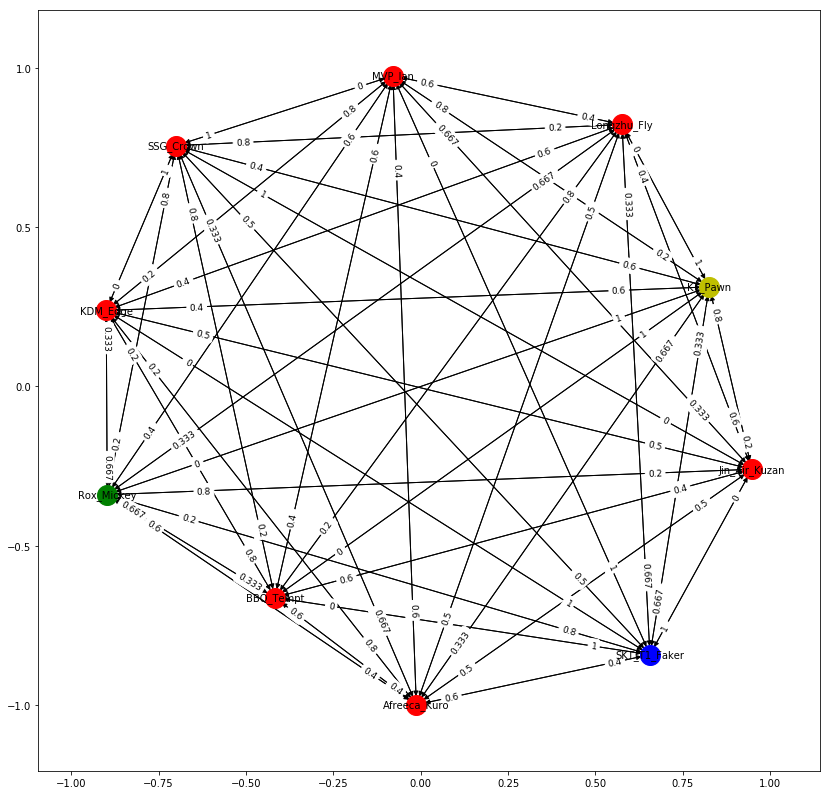

In [22]:
G = nx.DiGraph()
G.add_nodes_from(col)
pos=nx.spring_layout(G,scale = 1.0) # positions for all nodes
labels={}
for a in col:
    for b in col:
        if a != b:
            if df.loc[np.where(df[position] == a)][b].item() != 'x':
                G.add_edge(a,b,weight = df.loc[np.where(df[position] == b)][a].item())
    labels[a] = a
#print blue who is the best player by the KDA
nx.draw_networkx_nodes(G, pos,with_labels = True, nodelist=[firstKDA] ,node_color = 'b' ,node_size=400)
#print green who is the best player by the kill association
nx.draw_networkx_nodes(G, pos,with_labels = True, nodelist=[firstassociate] ,node_color = 'g' ,node_size=400)
#print yellow who is the best player by the winrate
nx.draw_networkx_nodes(G, pos,with_labels = True, nodelist=[firstwin] ,node_color = 'y' ,node_size=400)
#remove the node to print other nodes
col.remove(firstKDA)
if firstKDA !=firstassociate:
    col.remove(firstassociate)
if firstKDA !=firstwin and firstassociate !=firstwin:
    col.remove(firstwin)
for name in col:# draw rest of nodes
    nx.draw_networkx_nodes(G, pos,with_labels = True, nodelist=[name] ,node_color = 'r' ,node_size=400)
nx.draw_networkx_labels(G,pos,labels,font_size= 10) # draw node labels , player nickname
nx.draw_networkx_edges(G,pos,arrowsize = 10,width=1.0)# draw edges
edge_labels = nx.get_edge_attributes(G,'weight')# make edge labels by the edge weight
nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels,label_pos = 0.15, font_size = 9)#draw edge labels
print('각 1위의 노드가 같은 선수일 경우 뒤의 우선순위의 노드색으로 칠해집니다.')#give warnings that if best players by index is smae
print("상대전적 평균 1위 : 황색노드 "+firstwin)# give informations about nodes.
print("킬관여율 1위 : 녹색노드 " + firstassociate)
print("KDA1위 : 청색노드 " + firstKDA)
plt.show
plt.savefig(season+position+'.png')#save the data by the name of data